#Initialization

In [1]:
!pip install rebound
#!pip install ipympl
#%matplotlib widget
# %matplotlib inline
import math
import random
import csv
import rebound
#import ipympl
#import ipywidgets
import matplotlib.pyplot as plt
import json

#from google.colab import output
#output.enable_custom_widget_manager()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.3/295.3 KB 12.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for rebound: filename=rebound-3.24.0-cp39-cp39-linux_x86_64.whl size=819319 sha256=225a9a1c8df4343e0c3a9073ddc6b66277d5484bbfb732b9ce02621f0fc61605
  Stored in directory: /root/.cache/pip/wheels/17/e1/79/c7481eda21a9cc1006e2a684fc2a5eb57381b8dc818a3fd5be
Successfully built rebound


# Creating distribution of matter
- The matter gets created and randomly distributed
- Based on the formulas for density and velocity
- Saved in data.csv (x, y, z, vx, vy, vz)
- Distances in PC, velocities in km/s

##Usual distribution

In [ ]:
N = 1000      #number of swarms
M = 10**6     #Sun masses
R = 10        #PC
a = 0.6*R     #unit of R
m = M/N       #units of M, swarm mass
spheres = 20  #number of spheres to iterate through, experimental, dimensionless

swarms = []
class Swarm:
    def __init__(self, x, y, z, vx, vy, vz):
        self.x = x
        self.y = y
        self.z = z
        self.vx = vx
        self.vy = vy
        self.vz = vz
    def __str__(self):
        return f"{round(self.x, 3)} {round(self.y, 3)} {round(self.z, 3)}    {round(self.vx, 3)} {round(self.vy, 3)} {round(self.vz, 3)}    {math.sqrt(self.x**2+self.y**2+self.z**2)} {math.sqrt(self.vx**2+self.vy**2+self.vz**2)}"

def density(r):     #unit of mass/R^3
    return 3*M/(4*math.pi*a**3*(1+r**2/a**2)**(5/2))

def velocity(r):
    v = (1-r/(R+0.5))*15    #in km/s; r,R in PC
    vx = random.uniform(0, v)
    vy = random.uniform(0, math.sqrt(v**2-vx**2))
    vz = math.sqrt(v**2-vx**2-vy**2)
    return vx, vy, vz

for i in range(spheres):
    #find the distance of the sphere from the center
    radius = (R/spheres)*(i+1) #unit of R
    #calculate point density of the sphere
    den = density(radius)
    #find the number of swarms to add
    num = round(den*4*math.pi*radius**2*R/spheres/m)
    #add the swarms
    for j in range(num):
        x = random.uniform(0, radius)
        y = random.uniform(0, math.sqrt(radius**2-x**2))
        z = math.sqrt(radius**2-x**2-y**2)
        x *= [-1,1][random.randrange(2)]
        y *= [-1,1][random.randrange(2)]
        z *= [-1,1][random.randrange(2)]
        vx, vy, vz = velocity(radius)
        swarms.append(Swarm(x, y, z, vx, vy, vz))

# for i in swarms:
#     print(i)
# print(f"Mass should be {M}, it is {len(swarms)*m}, meaning {M/len(swarms)/m} ratio")

# add data to data.csv
with open("drive/MyDrive/simulation/data.csv", "w") as fp:
    writer = csv.writer(fp)
    writer.writerow([m])
    for i in swarms:
        writer.writerow([i.x, i.y, i.z, i.vx, i.vy, i.vz])

print("Generating data successful")

Generating data successful


##Black hole in the center

In [ ]:
import math
import random
import csv

N = 1000            # number of swarms
M = 10**6           # Sun masses
R = 10              # PC
a = 0.6*R           # unit of R

bh_mass = 0.1*M     # mass of the black hole
R_start = 0.1*R     # closest distance of swarm from the center

m = (M-bh_mass)/N   # units of M, swarm mass
spheres = 20        # number of spheres to iterate through, experimental, dimensionless

swarms = []
class Swarm:
    def __init__(self, x, y, z, vx, vy, vz):
        self.x = x
        self.y = y
        self.z = z
        self.vx = vx
        self.vy = vy
        self.vz = vz
    def __str__(self):
        return f"{round(self.x, 3)} {round(self.y, 3)} {round(self.z, 3)}    {round(self.vx, 3)} {round(self.vy, 3)} {round(self.vz, 3)}    {math.sqrt(self.x**2+self.y**2+self.z**2)} {math.sqrt(self.vx**2+self.vy**2+self.vz**2)}"

# Point density at distance r
def density(r):     #unit of mass/R^3
    return 3*M/(4*math.pi*a**3*(1+r**2/a**2)**(5/2))

# Velocity of a swarm at r[PC]
def velocity(r):
    v = (1-r/(R+0.5))*15    #in km/s; r,R in PC
    vx = random.uniform(0, v)
    vy = random.uniform(0, math.sqrt(v**2-vx**2))
    vz = math.sqrt(v**2-vx**2-vy**2)
    return vx, vy, vz

for i in range(spheres):
    #find the distance of the sphere from the center
    radius = ((R-R_start)/spheres)*(i+1)+R_start #unit of R
    #calculate point density of the sphere
    den = density(radius)
    #find the number of swarms to add
    num = round(den*4*math.pi*radius**2*R/spheres/m)
    #add the swarms
    for j in range(num):
        x = random.uniform(0, radius)
        y = random.uniform(0, math.sqrt(radius**2-x**2))
        z = math.sqrt(radius**2-x**2-y**2)
        x *= [-1,1][random.randrange(2)]
        y *= [-1,1][random.randrange(2)]
        z *= [-1,1][random.randrange(2)]
        vx, vy, vz = velocity(radius)
        swarms.append(Swarm(x, y, z, vx, vy, vz))

# for i in swarms:
#     print(i)
# print(f"Mass should be {M}, it is {len(swarms)*m}, meaning {M/len(swarms)/m} ratio")

# add data to data.csv
with open("data.csv", "w") as fp:
    writer = csv.writer(fp)
    writer.writerow([m]) #swarm mass
    writer.writerow([bh_mass]) #black hole mass
    for i in swarms:
        writer.writerow([i.x, i.y, i.z, i.vx, i.vy, i.vz])

print("Generating data successful")

#Running the simulation
- take data from data.csv
- add the data to simulation
- integrate for certain T
- display the data
- save the data for later use

## Simulation setup
- timestep is chosen in sim.dt

In [2]:
# unit conversion
PC = 3.08567758E16  # PC to m
MS = 1.989E30       # Ms to kg
YR = 31556926       # Yr to s
G  = 6.67E-11       # G in SI units

###Create new simulation

In [ ]:
sim = rebound.Simulation()
sim.G = G     # in m^3 kg^-1 s^-2
# sim.dt = YR   # timestep of 1 year    10000/1000y

# load initial data distribution from csv
with open("drive/MyDrive/simulation/data.csv", "r") as fp:
    data = csv.reader(fp)
    m = 0
    for i in data:
        if(m==0):
            # load mass from the first line of .csv
            m = float(i[0])
            continue
        sim.add(m=m*MS, x=float(i[0])*PC, y=float(i[1])*PC, z=float(i[2])*PC, vx=float(i[3])*1000, vy=float(i[4])*1000, vz=float(i[5])*1000)
data = [[[i.x],[i.y],[i.z],[i.vx],[i.vy],[i.vz]] for i in sim.particles]   # variable to store the positions
print(f"Starting a new simulation with {len(data)} objects.")

Starting a new simulation with 642 objects.


###Load an existing simulation

In [3]:
sim = rebound.Simulation("drive/MyDrive/simulation/8_8mil/snapshot.bin")

with open("drive/MyDrive/simulation/8_8mil/data.json", "r") as fp:
    data = json.load(fp)
print(f"Resuming simulation with {len(data)} objects at {sim.t/31556926} years.\nG is {sim.G} and timestep is {sim.dt/YR} years.")

/usr/local/lib/python3.9/dist-packages/rebound/simulation.py:825: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)


Resuming simulation with 642 objects at 8800000.0 years.
G is 6.67e-11 and timestep is 0.0082213179583346 years.


##Integrating the simulation

In [ ]:
sim.dt = 1000*YR
for i in range(50): #integrates by 100k years
  init = sim.t
  for k in range(10):
    sim.integrate(init+YR*1000*(k+1))
  # for j in range(1000):
  #   sim.integrate(init+YR*(j+1))
  #   print(j)
    print(sim.t/YR)
    print(sim.dt/YR)
    for j in range(len(sim.particles)):
      data[j][0].append(sim.particles[j].x)
      data[j][1].append(sim.particles[j].y)
      data[j][2].append(sim.particles[j].z)
      data[j][3].append(sim.particles[j].vx)
      data[j][4].append(sim.particles[j].vy)
      data[j][5].append(sim.particles[j].vz)
  with open("drive/MyDrive/simulation/data.json", "w") as fp:
    fp.write(json.dumps(data))
  sim.save("drive/MyDrive/simulation/snapshot.bin")

In [ ]:
#using the step function to make it fasater
for i in range(410):
  sim.dt=1000*YR
  sim.step()
  for j in range(len(sim.particles)):
      data[j][0].append(sim.particles[j].x)
      data[j][1].append(sim.particles[j].y)
      data[j][2].append(sim.particles[j].z)
      data[j][3].append(sim.particles[j].vx)
      data[j][4].append(sim.particles[j].vy)
      data[j][5].append(sim.particles[j].vz)
  print(sim.t/YR)
  print(sim.dt/YR)

##Save simulation data
- snapshot.bin is the simulation
- data.json is the data variable storing positions

In [ ]:
with open("drive/MyDrive/simulation/data2.json", "w") as fp:
    fp.write(json.dumps(data))
sim.save("drive/MyDrive/simulation/snapshot2.bin")

#Display the positions

###Using Matplotlib 3D plot (not working well in colab)

3800000.0


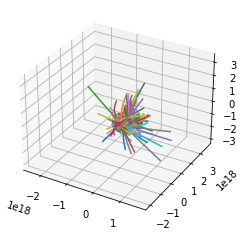

In [4]:
# !pip install ipympl
# %matplotlib widget
print(sim.t/31556926)
fig = plt.figure()
ax = plt.axes(projection="3d")
for i in data:

    #ax.scatter3D(i[0][0], i[1][0], i[2][0])   # sketch initial position

    ax.plot3D(i[0], i[1], i[2])   # sketch trajectory
plt.show()

In [ ]:
%matplotlib inline
# op = rebound.OrbitPlot(sim)
op = rebound.OrbitPlotSet(sim, particles=range(1, 500, 100))

###Using WebGL (not working)

In [ ]:
w = sim.getWidget()
w

### Animating in Matplotlib

In [ ]:
sim2 = rebound.Simulation()


fig, ax = rebound.OrbitPlot(sim, unitlabel="[AU]")
ani = rebound.Simulation.animate(sim, fig=fig, ax=ax, interval=200)
plt.show()

### Scatter

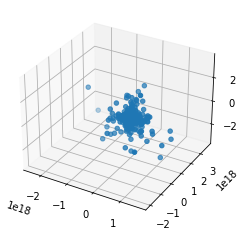

In [5]:
#resulting position
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D([i[0][-1] for i in data], [i[1][-1] for i in data], [i[2][-1] for i in data])
plt.show()

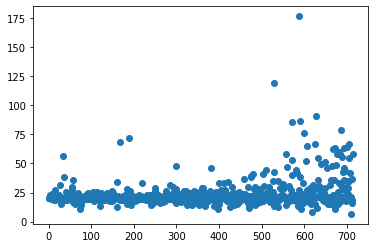

In [6]:
# Distribution of distances from the center (0, 0, 0)
fig = plt.figure()
ax = plt.axes()
ax.scatter(range(len(sim.particles)), [(i.x**2+i.y**2+i.z**2)**0.5/PC for i in sim.particles])
plt.show()

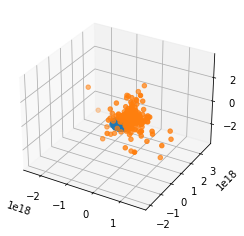

In [7]:
#intial position
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D([i[0][0] for i in data], [i[1][0] for i in data], [i[2][0] for i in data])
ax.scatter3D([i[0][-1] for i in data], [i[1][-1] for i in data], [i[2][-1] for i in data]) # final positions, orange
plt.show()

###Animation of the movement

In [ ]:
import matplotlib.animation as animation

fig = plt.figure()
ax = plt.axes(projection="3d")


def update_plot(j):
    ax.clear()
    ax.scatter3D([i[0][j] for i in data], [i[1][j] for i in data], [i[2][j] for i in data])
    print(j)

# Set up the animation
ani = animation.FuncAnimation(fig, update_plot, frames=8800, interval=5)
ani.save('drive/MyDrive/simulation/animation_8_8mil.mp4')
# plt.show()

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276


#Analysis

##Util functions

In [8]:
def radial(x, y, z, vx, vy, vz):
    return (x*vx+y*vy+z*vz)/(x**2+y**2+z**2)**0.5

def tangential(x, y, z, vx, vy, vz):
    return ((vx**2+vy**2+vz**2)**2-radial(x, y, z, vx, vy, vz)**2)**0.5

##Changes in velocity

###Radial

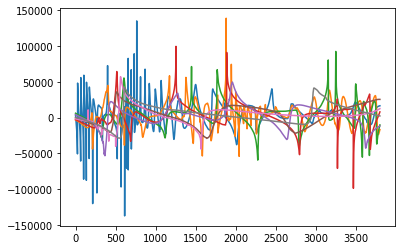

In [15]:
fig = plt.figure()
ax = plt.axes()
for j in range(1,len(data),100):
  ax.plot([radial(data[j][0][i], data[j][1][i], data[j][2][i], data[j][3][i], data[j][4][i], data[j][5][i]) for i in range(len(data[0][0])) if (data[j][0][i]**2+data[j][1][i]**2+data[j][2][i]**2)**0.5 != 0])

plt.show()

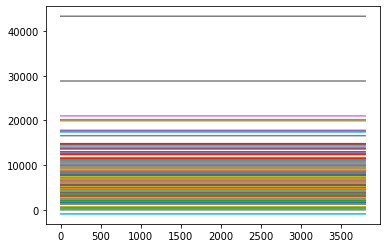

In [16]:
# Average radial
def avg_v(lst):
  return sum(lst)/len(lst)

fig = plt.figure()
ax = plt.axes()

# ax.plot([radial(data[160][0][i], data[160][1][i], data[160][2][i], data[160][3][i], data[160][4][i], data[160][5][i]) for i in range(len(data[0][0]))])
# ax.plot(len(data[160][0])*[avg_v([radial(data[160][0][i], data[160][1][i], data[160][2][i], data[160][3][i], data[160][4][i], data[160][5][i]) for i in range(len(data[0][0]))])])

for j in range(len(data))[1:]:
  ax.plot(len(data[j][0])*[avg_v([radial(data[j][0][i], data[j][1][i], data[j][2][i], data[j][3][i], data[j][4][i], data[j][5][i]) for i in range(len(data[0][0]))])])

plt.show()

###Comparing simulation v to calculated v

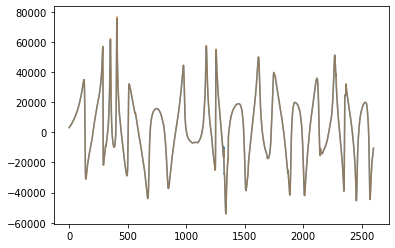

In [ ]:
def vel(prev, new):
  return (new-prev)/1000/YR

fig = plt.figure()
ax = plt.axes()
# ax.plot([vx(data[20][0][i], data[20][0][i+1]) for i in range(len(data[0][0][:-1]))])
# ax.plot(data[20][3], alpha=0.5)
# ax.plot([vx(data[20][1][i], data[20][1][i+1]) for i in range(len(data[0][0][:-1]))])
# ax.plot(data[20][4], alpha=0.5)
ax.plot([vel(data[20][2][i], data[20][2][i+1]) for i in range(len(data[0][0][:-1]))])
ax.plot(data[20][5], alpha=0.5)

plt.show()

##Changes in distance

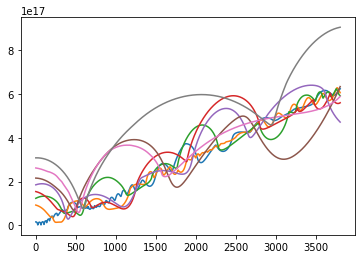

In [18]:
fig = plt.figure()
ax = plt.axes()
for j in range(1,len(data),100):
  ax.plot([(data[j][0][i]**2+data[j][1][i]**2+data[j][2][i]**2)**0.5 for i in range(len(data[0][0]))])

plt.show()

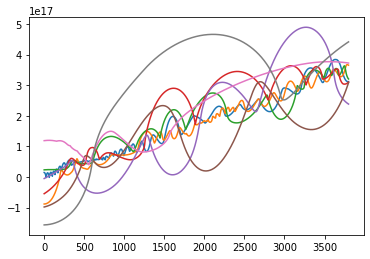

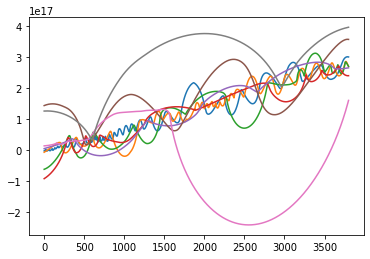

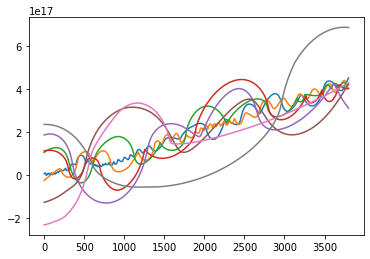

In [19]:
# Changes in directions
# Investigating whether the whole cluster is moving in the same direction
fig1 = plt.figure()
ax1 = plt.axes()
fig2 = plt.figure()
ax2 = plt.axes()
fig3 = plt.figure()
ax3 = plt.axes()
for j in range(1,len(data),100):
  ax1.plot(data[j][0])
  ax2.plot(data[j][1])
  ax3.plot(data[j][2])

###Shift in Center of Mass

In [20]:
com = sim.calculate_com()
print(f"{com.x/PC} {com.y/PC} {com.z/PC}\n{(com.x**2+com.y**2+com.z**2)**0.5/PC}")

11.335244539936932 9.066641873917078 13.863051705388358
20.071770381217192


In [21]:
# Shift in black hole
print((sim.particles[0].x**2+sim.particles[0].y**2+sim.particles[0].z**2)**0.5/PC)

20.232357669841665


##Relative to CoM

In [22]:
class CoM:
  position = sim.calculate_com()
  vx = position.x/sim.t     # in base units (m/s)
  vy = position.y/sim.t
  vz = position.z/sim.t
  v = (vx**2+vy**2+vz**2)**0.5

  def __str__(self) -> str:
     pass

  # Position, t in seconds
  def x(self, t=sim.t):
    return self.vx*t        # in m
  
  def y(self, t=sim.t):
    return self.vy*t
  
  def z(self, t=sim.t):
    return self.vz*t

  def pos(self, t=sim.t):
    return (self.x(t)**2+self.y(t)**2+self.z(t)**2)**0.5

center_of_mass = CoM()
print(center_of_mass.vx, center_of_mass.vy, center_of_mass.vz)
print(center_of_mass.x()/PC, center_of_mass.y()/PC, center_of_mass.z()/PC)
  

2916.776489698315 2333.0213799254084 3567.2299038000174
11.335244539936932 9.06664187391708 13.863051705388358


###Displaying

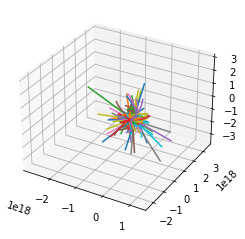

In [23]:
fig = plt.figure()
ax = plt.axes(projection="3d")
for i in data:

    #ax.scatter3D(i[0][0], i[1][0], i[2][0])   # sketch initial position
    xList = [i[0][j]-center_of_mass.x(1000*YR*j) for j in range(len(data[0][0]))]
    yList = [i[1][j]-center_of_mass.y(1000*YR*j) for j in range(len(data[0][0]))]
    zList = [i[2][j]-center_of_mass.z(1000*YR*j) for j in range(len(data[0][0]))]
    ax.plot3D(xList, yList, zList)   # sketch trajectory
plt.show()

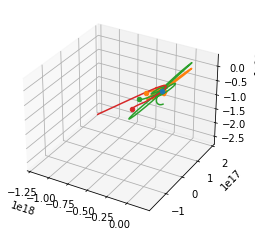

In [25]:
#inspecting a smaller sample, looking at periodicity
fig = plt.figure()
ax = plt.axes(projection="3d")
for i in data[::200]:
    ax.scatter3D(i[0][0], i[1][0], i[2][0])   # sketch initial position
    xList = [i[0][j]-center_of_mass.x(1000*YR*j) for j in range(len(data[0][0]))]
    yList = [i[1][j]-center_of_mass.y(1000*YR*j) for j in range(len(data[0][0]))]
    zList = [i[2][j]-center_of_mass.z(1000*YR*j) for j in range(len(data[0][0]))]
    ax.plot3D(xList, yList, zList)   # sketch trajectory
plt.show()

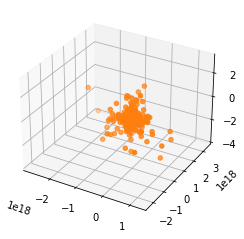

In [26]:
#intial position
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D([i[0][0] for i in data], [i[1][0] for i in data], [i[2][0] for i in data])
ax.scatter3D([i[0][-1]-center_of_mass.x() for i in data], [i[1][-1]-center_of_mass.y() for i in data], [i[2][-1]-center_of_mass.z() for i in data]) # some of the final positions, orange
plt.show()

###Distance to CoM

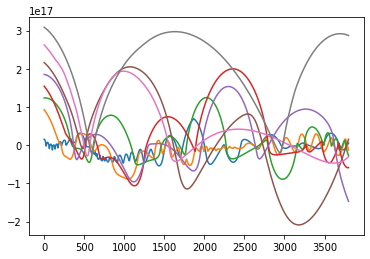

In [31]:
fig = plt.figure()
ax = plt.axes()
for j in range(1,len(data),100):
  ax.plot([(data[j][0][i]**2+data[j][1][i]**2+data[j][2][i]**2)**0.5-center_of_mass.pos(i*YR*1000) for i in range(len(data[0][0]))])

plt.show()

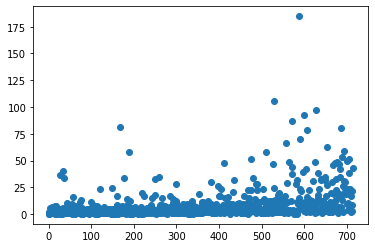

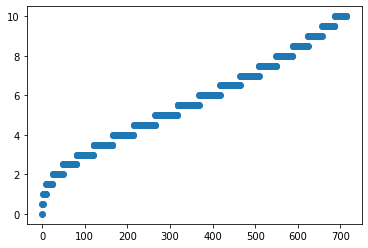

In [37]:
# Distribution of distances from CoM at the beginning vs at the end

#at the end
fig = plt.figure()
ax = plt.axes()
ax.scatter(range(len(sim.particles)), [((i.x-center_of_mass.x())**2+(i.y-center_of_mass.y())**2+(i.z-center_of_mass.z())**2)**0.5/PC for i in sim.particles])

#at the beginning
fig2 = plt.figure()
ax2 = plt.axes()
ax2.scatter(range(len(sim.particles)), [(i[0][0]**2+i[1][0]**2+i[2][0]**2)**0.5/PC for i in data])

plt.show()

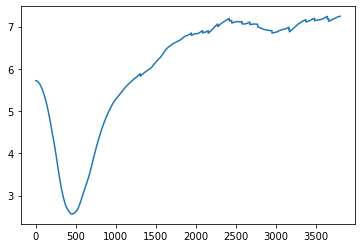

In [33]:
# average distance from the center with time
def lst(num):
  var1 = [((i[0][num]-center_of_mass.x(num*1000*YR))**2+(i[1][num]-center_of_mass.y(num*1000*YR))**2+(i[2][num]-center_of_mass.z(num*1000*YR))**2)**0.5/PC for i in data if ((i[0][num]-center_of_mass.x(num*1000*YR))**2+(i[1][num]-center_of_mass.y(num*1000*YR))**2+(i[2][num]-center_of_mass.z(num*1000*YR))**2)**0.5/PC < 50]
  return sum(var1)/len(var1)

y = [lst(i) for i in range(len(data[0][0]))]


fig = plt.figure()
ax = plt.axes()
ax.plot(y)
plt.show()

###Velocities

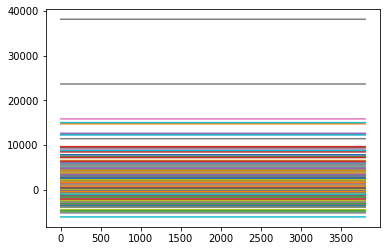

In [34]:
# Average radial
def avg_v(lst):
  return sum(lst)/len(lst)

fig = plt.figure()
ax = plt.axes()

# ax.plot([radial(data[160][0][i], data[160][1][i], data[160][2][i], data[160][3][i], data[160][4][i], data[160][5][i]) for i in range(len(data[0][0]))])
# ax.plot(len(data[160][0])*[avg_v([radial(data[160][0][i], data[160][1][i], data[160][2][i], data[160][3][i], data[160][4][i], data[160][5][i]) for i in range(len(data[0][0]))])])

for j in range(len(data))[1:]:
  ax.plot(len(data[j][0])*[avg_v([radial(data[j][0][i], data[j][1][i], data[j][2][i], data[j][3][i], data[j][4][i], data[j][5][i])-center_of_mass.v for i in range(len(data[0][0]))])])

plt.show()

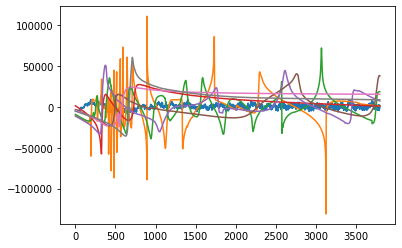

In [35]:
fig = plt.figure()
ax = plt.axes()
for j in range(0,len(data),100):
  # if((data[j][0]**2+data[j][1]**2+data[j][2]**2)**0.5 == 0):
  #   continue
  ax.plot([radial(data[j][0][i], data[j][1][i], data[j][2][i], data[j][3][i], data[j][4][i], data[j][5][i])-center_of_mass.v for i in range(len(data[0][0])) if (data[j][0][i]**2+data[j][1][i]**2+data[j][2][i]**2)**0.5 != 0])

plt.show()

#Other

In [ ]:
# Dilluting the data.json into data_dil.json

# 10 times less dense
data_dil = [[j[::10] for j in data[index]] for (index, i) in enumerate(data)]
print(len(data[0][0]))
print(len(data_dil[0][0]))

with open("drive/MyDrive/simulation/black_hole/3_3mil/data_dil.json", "w") as fp:
    fp.write(json.dumps(data_dil))

8801
881


## Energy and escape velocity

In [ ]:
def energy(t):
  [i for i in data]

def vel_escape(R):
  return (2*sim.G*sim.particles[1].m/R)**0.5

fig = plt.figure()
ax = plt.axes()
ax.scatter()
plt.show()